# Ames Housing Prices - Step 3: Feature Prep
Now that we have clean data, let's focus on making sure our features are ready for modeling.

In [36]:
# Basic setup
%run config.ipynb

Cortex Python SDK v5.4.1


In [39]:
# Connect to Cortex 5
cortex = Cortex.client()

In [41]:
# Start with the same training dataset from Step 2
train_ds = cortex.dataset('kaggle/ames-housing-train')

### Feature Prep Pipeline
Lets create a new pipeline that depends on our _clean_ pipeline and adds some feature prep steps.

In [44]:
pipeline = train_ds.pipeline('features', depends=['clean'], clear_cache=True)
pipeline.reset()

---
From our analysis, we remember that our target variable, _SalePrice_, is not normally distributed.  Let's scale it using the numpy _log1p_ method.

In [47]:
def scale_target(pipeline, df):
    df['SalePrice'] = np.log1p(df['SalePrice'])

pipeline.add_step(scale_target)

In [49]:
train_df = pipeline.run()

running pipeline [clean] for dataset [kaggle/ames-housing-train]:
> drop_unused 
> drop_outliers 
> fill_zero_cols 
> fill_median_cols 
> fill_na_none 
running pipeline [features] for dataset [kaggle/ames-housing-train]:
> scale_target 


In [51]:
viz = train_ds.visuals(train_df, figsize=(24, 9))

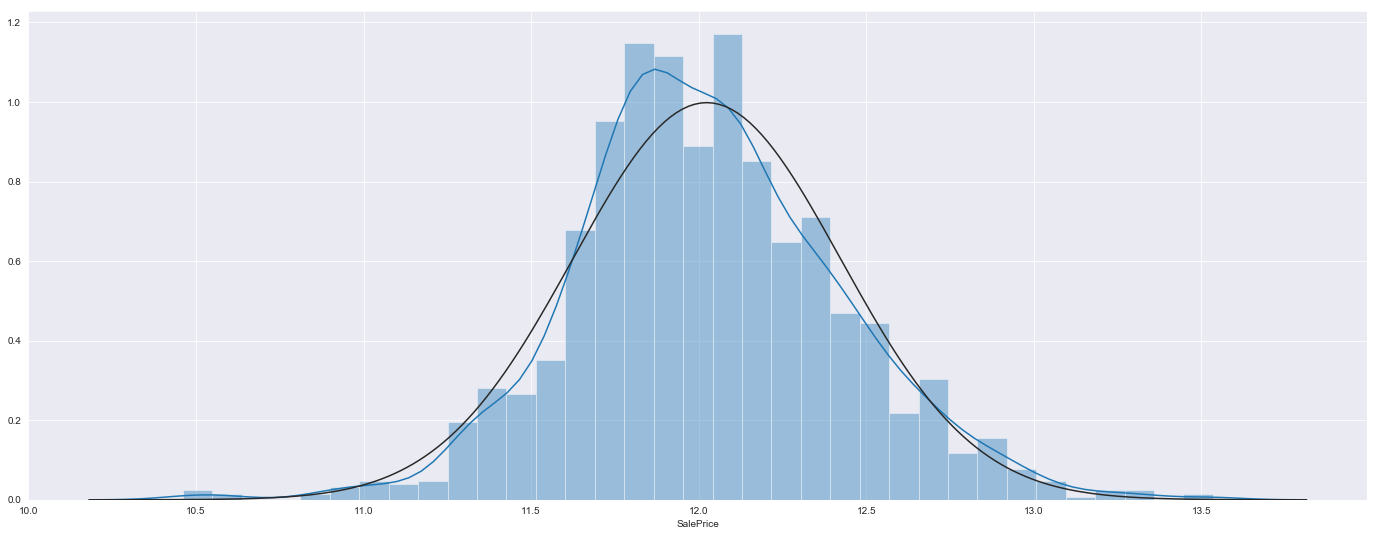

<Figure size 1728x648 with 0 Axes>

In [53]:
viz.show_dist('SalePrice')

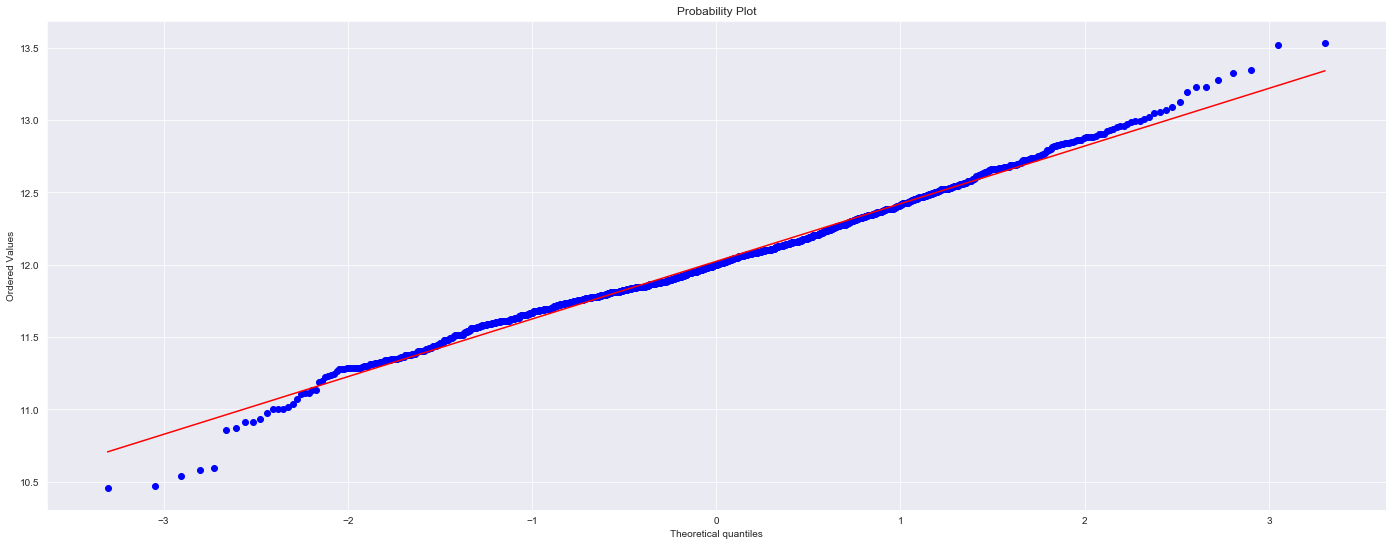

<Figure size 1728x648 with 0 Axes>

In [55]:
viz.show_probplot('SalePrice')